In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Assuming you have a pandas DataFrame named 'sub_movies' with a column 'year'

YEAR_COLUMN = 'year'

df = pd.read_csv("./2_parse_links/metadata/before2010/sub_clean_meta_en_prime.csv")
df_ref = pd.read_csv("./4_parse_xrays/parsed_xrays/before2010_sub_movies_with_xrays.csv")

df_final = df[df['fname'].isin(df_ref['file'])]

In [40]:
df_ref = pd.read_csv("./4_parse_xrays/parsed_xrays/before2010_sub_movies_with_xrays.csv")
df_ref2 = pd.read_csv("./4_parse_xrays/parsed_xrays/com_sub_movies_with_xrays.csv")

df = pd.read_csv("./2_parse_links/metadata/before2010/sub_clean_meta_en_prime.csv")
df2 = pd.read_csv("./2_parse_links/metadata/com/clean_meta_en_prime.csv")

_df1 = df[df['fname'].isin(df_ref['file'])]
_df2 = df2[df2['fname'].isin(df_ref2['file'])]

df_final = pd.concat([_df1, _df2])

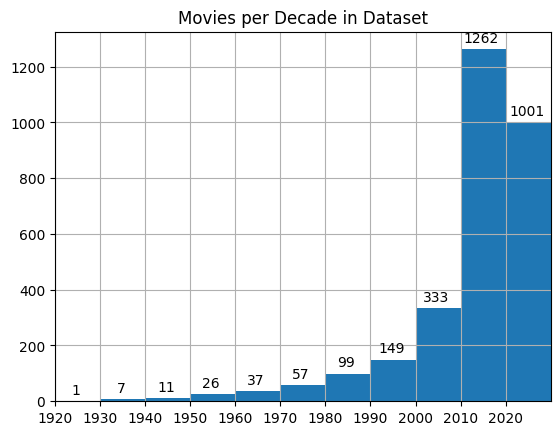

In [46]:
movies = df_final.copy()
# Convert individual years to decades
movies['decade'] = (movies[YEAR_COLUMN] // 10) * 10

# Calculate the number of movies per decade
decade_counts = movies['decade'].value_counts().sort_index()
decades = np.arange(1920, 2030, 10)
counts = [decade_counts.get(decade, 0) for decade in decades]

# Create the histogram
plt.bar(decades, counts, align='edge', width=10)

# Set the x-axis limits and ticks
plt.xlim([1920, 2030])
# plt.ylim([0, 500])
plt.xticks(decades)

# Annotate each bar with the count
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(decades[i], count), xytext=(15, 5),
                 textcoords='offset points', ha='center')

# Display the histogram
plt.grid()
plt.title("Movies per Decade in Dataset")
plt.show()